# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
import config
from scipy.stats import mannwhitneyu

# Set constants

In [2]:
# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# set figure details
figsize = (20, 6)
dpi = 200

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

filename = "violin.svg"

# Import data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "is_healthy.csv"), index_col=[0, 1])
GMHI2_scores = pd.read_csv(os.path.join(config.PREDICTION_DIR, "GMHI2_scores.csv"), index_col=[0, 1])
display(X.head())
display(y.head())
display(GMHI2_scores.head())

k__Archaea  k__Archaea|p__Euryarchaeota  \
Study_ID Sample Accession                                            
GMHI-23  SAMEA3879547        0.019774                     0.019774   
         SAMEA3879551        0.000000                     0.000000   
         SAMEA3879543        0.003253                     0.003253   
         SAMEA3879565        0.008863                     0.008863   
         SAMEA3879546        0.000048                     0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria  \
Study_ID Sample Accession                                                   
GMHI-23  SAMEA3879547                                            0.019774   
         SAMEA3879551                                            0.000000   
         SAMEA3879543                                            0.003253   
         SAMEA3879565                                            0.008863   
         SAMEA3879546                                            0.000048   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales  \
Study_ID Sample Accession                                                                         
GMHI-23  SAMEA3879547                                               0.019774                      
         SAMEA3879551                                               0.000000                      
         SAMEA3879543                                               0.003253                      
         SAMEA3879565                                               0.008863                      
         SAMEA3879546                                               0.000048                      

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae  \
Study_ID Sample Accession                                                                                                
GMHI-23  SAMEA3879547                                               0.019774                                             
         SAMEA3879551                                               0.000000                                             
         SAMEA3879543                                               0.003253                                             
         SAMEA3879565                                               0.008863                                             
         SAMEA3879546                                               0.000048                                             

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter  \
Study_ID Sample Accession                                                                                                                      
GMHI-23  SAMEA3879547                                               0.019774                                                                   
         SAMEA3879551                                               0.000000                                                                   
         SAMEA3879543                                               0.003253                                                                   
         SAMEA3879565                                               0.008863                                                                   
         SAMEA3879546                                               0.000048                                                                   

                           k__Archaea|p__Euryarchaeota|c__Methanobacteria|o__Methanobacteriales|f__Methanobacteriaceae|g__Methanobrevibacter|s__Methanobrevibacter_smithii  \
Study_ID Sample Accession                                                                                                                                                    
GMHI-23  SAMEA3879547                                               0.019774              

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-23  SAMEA3879547                              True
         SAMEA3879551                              True
         SAMEA3879543                              True
         SAMEA3879565                              True
         SAMEA3879546                              True

GMHI2
Study_ID Sample Accession          
GMHI-23  SAMEA3879547      1.884788
         SAMEA3879551     -0.062656
         SAMEA3879543     -0.890399
         SAMEA3879565      0.468921
         SAMEA3879546      1.171292

# Compute other ecological indices for comparisons

## Compute GMHI

In [4]:
mh = [
"s__Alistipes_senegalensis",
"s__Bacteroidales_bacterium_ph8",
"s__Bifidobacterium_adolescentis",
"s__Bifidobacterium_angulatum",
"s__Bifidobacterium_catenulatum",
"s__Lachnospiraceae_bacterium_8_1_57FAA",
"s__Sutterella_wadsworthensis",
]    
mn = ["s__Anaerotruncus_colihominis",
"s__Atopobium_parvulum",
"s__Bifidobacterium_dentium",
"s__Blautia_producta",
"s__candidate_division_TM7_single_cell_isolate_TM7c",
"s__Clostridiales_bacterium_1_7_47FAA",
"s__Clostridium_asparagiforme",
"s__Clostridium_bolteae",
"s__Clostridium_citroniae",
"s__Clostridium_clostridioforme",
"s__Clostridium_hathewayi",
"s__Clostridium_nexile",
"s__Clostridium_ramosum",
"s__Clostridium_symbiosum",
"s__Eggerthella_lenta",
"s__Erysipelotrichaceae_bacterium_2_2_44A",
"s__Flavonifractor_plautii",
"s__Fusobacterium_nucleatum",
"s__Gemella_morbillorum",
"s__Gemella_sanguinis",
"s__Granulicatella_adiacens",
"s__Holdemania_filiformis",
"s__Klebsiella_pneumoniae",
"s__Lachnospiraceae_bacterium_1_4_56FAA",
"s__Lachnospiraceae_bacterium_2_1_58FAA",
"s__Lachnospiraceae_bacterium_3_1_57FAA_CT1",
"s__Lachnospiraceae_bacterium_5_1_57FAA",
"s__Lachnospiraceae_bacterium_9_1_43BFAA",
"s__Lactobacillus_salivarius",
"s__Peptostreptococcus_stomatis",
"s__Ruminococcaceae_bacterium_D16",
"s__Ruminococcus_gnavus",
"s__Solobacterium_moorei",
"s__Streptococcus_anginosus",
"s__Streptococcus_australis",
"s__Streptococcus_gordonii",
"s__Streptococcus_infantis",
"s__Streptococcus_mitis_oralis_pneumoniae",
"s__Streptococcus_sanguinis",
"s__Streptococcus_vestibularis",
"s__Subdoligranulum_sp_4_3_54A2FAA",
"s__Subdoligranulum_variabile",
"s__Veillonella_atypica",
]

In [5]:
from sklearn.base import BaseEstimator
from sklearn.metrics import balanced_accuracy_score
import numpy as np
import pandas as pd
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

"""
Class that implements the GMHI algorithm. Extends sklearn base estimator for
cross validation compatibility
"""


class GMHI(BaseEstimator):

    def __init__(self, use_shannon=False, theta_f=1, theta_d=0):
        self.use_shannon = use_shannon
        self.fitted = False
        self.thresh = 0.00001
        self.health_abundant = None
        self.health_scarce = None
        self.features = None
        self.theta_f = theta_f
        self.theta_d = theta_d

    def fit(self, X, y):
        """
        Identifies health_abundant and health_scarce
        columns/features
        """
        self.features = X.columns
        self.classes_ = np.unique(y)
        if(isinstance(X, pd.DataFrame)):
            X = X.values
        if(isinstance(y, pd.DataFrame)):
            y = y.values
        self.fitted = True
        difference, fold_change = self.get_proportion_comparisons(X, y)
        self.select_features(difference, fold_change)

    def get_proportion_comparisons(self, X, y):
        # get healthy and unhealthy samples
        healthies = X[y.flatten(), :]
        unhealthies = X[~y.flatten(), :]

        # get proportions for each species
        proportion_healthy = self.get_proportions(healthies)
        proportion_unhealthy = self.get_proportions(unhealthies)

        # get differences and fold change
        diff = proportion_healthy - proportion_unhealthy
        fold = proportion_healthy / proportion_unhealthy
        return diff, fold

    def get_proportions(self, samples_of_a_class):
        num_samples = samples_of_a_class.shape[0]
        p = np.sum(samples_of_a_class > self.thresh, axis=0) / num_samples
        return p

    def select_features(self, difference, fold_change):
        # based on proportion differences and fold change, select health abundant
        # and health scarce
        self.health_abundant = self.features[self.cutoff(difference, fold_change)]
        self.health_scarce = self.features[self.cutoff(-1 * difference, 1 / fold_change)]

    def cutoff(self, diff, fold):
        diff_cutoff = diff > self.theta_d
        fold_cutoff = fold > self.theta_f
        both_cutoff = np.bitwise_and(diff_cutoff, fold_cutoff)
        columns = np.where(both_cutoff)
        return columns[0]

    def decision_function(self, X):
        if not self.fitted:
            return None
        if list(X.columns) != list(self.features):
            raise Exception("Model was trained with (different) feature names than input")
        # if(isinstance(X, pd.DataFrame)):
        #    X = X.values
        X_healthy_features = X[self.health_abundant]
        X_unhealthy_features = X[self.health_scarce]
        psi_MH = self.get_psi(X_healthy_features.values) / (
            X_healthy_features.shape[1])
        psi_MN = self.get_psi(X_unhealthy_features.values) / (
            (X_unhealthy_features.shape[1]))
        num = psi_MH + self.thresh
        dem = psi_MN + self.thresh
        return np.log10(num / dem)

    def get_psi(self, X):
        psi = self.richness(X) * 1.0
        if self.use_shannon:
            shan = self.shannon(X)
            psi *= shan
        return psi

    def richness(self, X):
        """
        Returns the number of nonzero values for each sample (row) in X
        """
        rich = np.sum(X > self.thresh, axis=1)
        return rich

    def shannon(self, X):
        logged = np.log(X)
        logged[logged == -np.inf] = 0
        logged[logged == np.inf] = 0
        shan = logged * X * -1
        return np.sum(shan, axis=1)

    def predict(self, X):
        return self.decision_function(X) > 0

In [6]:
X_GMHI = X.copy()
X_GMHI.columns = [col.split("|")[-1] for col in X_GMHI.columns]
X_GMHI

k__Archaea  p__Euryarchaeota  c__Methanobacteria  \
Study_ID Sample Accession                                                     
GMHI-23  SAMEA3879547        0.019774          0.019774            0.019774   
         SAMEA3879551        0.000000          0.000000            0.000000   
         SAMEA3879543        0.003253          0.003253            0.003253   
         SAMEA3879565        0.008863          0.008863            0.008863   
         SAMEA3879546        0.000048          0.000048            0.000048   
...                               ...               ...                 ...   
P140     SAMN07509557        0.000000          0.000000            0.000000   
         SAMN07509558        0.000000          0.000000            0.000000   
         SAMN07509546        0.000000          0.000000            0.000000   
         SAMN07509552        0.000000          0.000000            0.000000   
         SAMN07509921        0.000000          0.000000            0.000000   

                           o__Methanobacteriales  f__Methanobacteriaceae  \
Study_ID Sample Accession                                                  
GMHI-23  SAMEA3879547                   0.019774                0.019774   
         SAMEA3879551                   0.000000                0.000000   
         SAMEA3879543                   0.003253                0.003253   
         SAMEA3879565                   0.008863                0.008863   
         SAMEA3879546                   0.000048                0.000048   
...                                          ...                     ...   
P140     SAMN07509557                   0.000000                0.000000   
         SAMN07509558                   0.000000                0.000000   
         SAMN07509546                   0.000000                0.000000   
         SAMN07509552                   0.000000                0.000000   
         SAMN07509921                   0.000000                0.000000   

                           g__Methanobrevibacter  \
Study_ID Sample Accession                          
GMHI-23  SAMEA3879547                   0.019774   
         SAMEA3879551                   0.000000   
         SAMEA3879543                   0.003253   
         SAMEA3879565                   0.008863   
         SAMEA3879546                   0.000048   
...                                          ...   
P140     SAMN07509557                   0.000000   
         SAMN07509558                   0.000000   
         SAMN07509546                   0.000000   
         SAMN07509552                   0.000000   
         SAMN07509921                   0.000000   

                           s__Methanobrevibacter_smithii  g__Methanosphaera  \
Study_ID Sample Accession                                                     
GMHI-23  SAMEA3879547                           0.019774                0.0   
         SAMEA3879551                           0.000000                0.0   
         SAMEA3879543                           0.003253                0.0   
         SAMEA3879565                           0.008863                0.0   
         SAMEA3879546                           0.000048                0.0   
...                                                  ...                ...   
P140     SAMN07509557                           0.000000                0.0   
         SAMN07509558                           0.000000                0.0   
         SAMN07509546                           0.000000                0.0   
         SAMN07509552                           0.000000                0.0   
         SAMN07509921                           0.000000                0.0   

                           s__Methanosphaera_stadtmanae  c__Thermoplasmata  \
Study_ID Sample Accession                                                    
GMHI-23  SAMEA3879547                               0.0                0.0   
         SAMEA3879551                               0.0                

In [7]:
clf = GMHI(use_shannon=True, theta_f=1.4, theta_d=0.1)
clf.health_abundant = list(set(mh) & set(X_GMHI.columns))
clf.health_scarce = list(set(mn) & set(X_GMHI.columns))
clf.fitted = True
clf.features = X_GMHI.columns

In [16]:
set(mh) - set(X_GMHI.columns)

{'s__Alistipes_senegalensis',
 's__Bacteroidales_bacterium_ph8',
 's__Lachnospiraceae_bacterium_8_1_57FAA',
 's__Sutterella_wadsworthensis'}

In [23]:
list(filter(lambda x : "Lachnospiraceae" in x, X_GMHI))

['f__Lachnospiraceae',
 'g__Lachnospiraceae_unclassified',
 's__Lachnospiraceae_bacterium_2_1_46FAA',
 's__Lachnospiraceae_bacterium_A4',
 's__Lachnospiraceae_bacterium_oral_taxon_096']

In [8]:
from sklearn.metrics import balanced_accuracy_score

GMHI_scores = pd.DataFrame(clf.decision_function(X_GMHI), index=y.index, columns=["GMHI"])

print(balanced_accuracy_score(y, GMHI_scores > 0))
GMHI_scores

0.6579295309303267


GMHI
Study_ID Sample Accession          
GMHI-23  SAMEA3879547     -1.517397
         SAMEA3879551     -3.072277
         SAMEA3879543     -2.488209
         SAMEA3879565     -1.473451
         SAMEA3879546      0.000000
...                             ...
P140     SAMN07509557     -0.017416
         SAMN07509558      0.000000
         SAMN07509546     -2.347015
         SAMN07509552     -2.528385
         SAMN07509921     -2.610595

[9045 rows x 1 columns]

## Compute Richness

In [9]:
X_species = X[list(filter(lambda x : "s__" in x, X.columns))]
richness = pd.DataFrame((X_species > config.PRESENCE_CUTOFF).sum(axis=1), columns=["Species Richness"])
richness

Species Richness
Study_ID Sample Accession                  
GMHI-23  SAMEA3879547                   106
         SAMEA3879551                    91
         SAMEA3879543                   127
         SAMEA3879565                   115
         SAMEA3879546                    76
...                                     ...
P140     SAMN07509557                    45
         SAMN07509558                     0
         SAMN07509546                    36
         SAMN07509552                    41
         SAMN07509921                    59

[9045 rows x 1 columns]

## Compute Shannon Diversity

In [10]:
shannon = pd.DataFrame(np.sum((-X_species * np.log(X_species)).fillna(0), axis=1), columns=["Shannon Diversity"])
shannon

Shannon Diversity
Study_ID Sample Accession                   
GMHI-23  SAMEA3879547               3.021834
         SAMEA3879551               3.020725
         SAMEA3879543               3.431392
         SAMEA3879565               3.415460
         SAMEA3879546               2.755221
...                                      ...
P140     SAMN07509557               2.280885
         SAMN07509558               0.000000
         SAMN07509546               1.100328
         SAMN07509552               1.882929
         SAMN07509921               2.508624

[9045 rows x 1 columns]

# Aggregate data and plot!

In [11]:
healthy_nonhealthy = y.copy()
healthy_nonhealthy.columns = ["Health status"]
healthy_nonhealthy[y.values] = "Healthy"
healthy_nonhealthy[~y.values] = "Nonhealthy"

data = pd.concat([GMHI2_scores, GMHI_scores, healthy_nonhealthy, richness, shannon], axis=1)
data

GMHI2      GMHI Health status  Species Richness  \
Study_ID Sample Accession                                                       
GMHI-23  SAMEA3879547      1.884788 -1.517397       Healthy               106   
         SAMEA3879551     -0.062656 -3.072277       Healthy                91   
         SAMEA3879543     -0.890399 -2.488209       Healthy               127   
         SAMEA3879565      0.468921 -1.473451       Healthy               115   
         SAMEA3879546      1.171292  0.000000       Healthy                76   
...                             ...       ...           ...               ...   
P140     SAMN07509557      0.279109 -0.017416    Nonhealthy                45   
         SAMN07509558      0.000000  0.000000    Nonhealthy                 0   
         SAMN07509546     -0.781096 -2.347015    Nonhealthy                36   
         SAMN07509552     -0.590392 -2.528385    Nonhealthy                41   
         SAMN07509921      0.033147 -2.610595    Nonhealthy                59   

                           Shannon Diversity  
Study_ID Sample Accession                     
GMHI-23  SAMEA3879547               3.021834  
         SAMEA3879551               3.020725  
         SAMEA3879543               3.431392  
         SAMEA3879565               3.415460  
         SAMEA3879546               2.755221  
...                                      ...  
P140     SAMN07509557               2.280885  
         SAMN07509558               0.000000  
         SAMN07509546               1.100328  
         SAMN07509552               1.882929  
         SAMN07509921               2.508624  

[9045 rows x 5 columns]

In [12]:
def observeDifference(a, b):
    u, man_whitney_u_p_val = mannwhitneyu(a, b)
    cliffs_delta = (2 * u) / (a.shape[0] * b.shape[0]) - 1
    return cliffs_delta, man_whitney_u_p_val

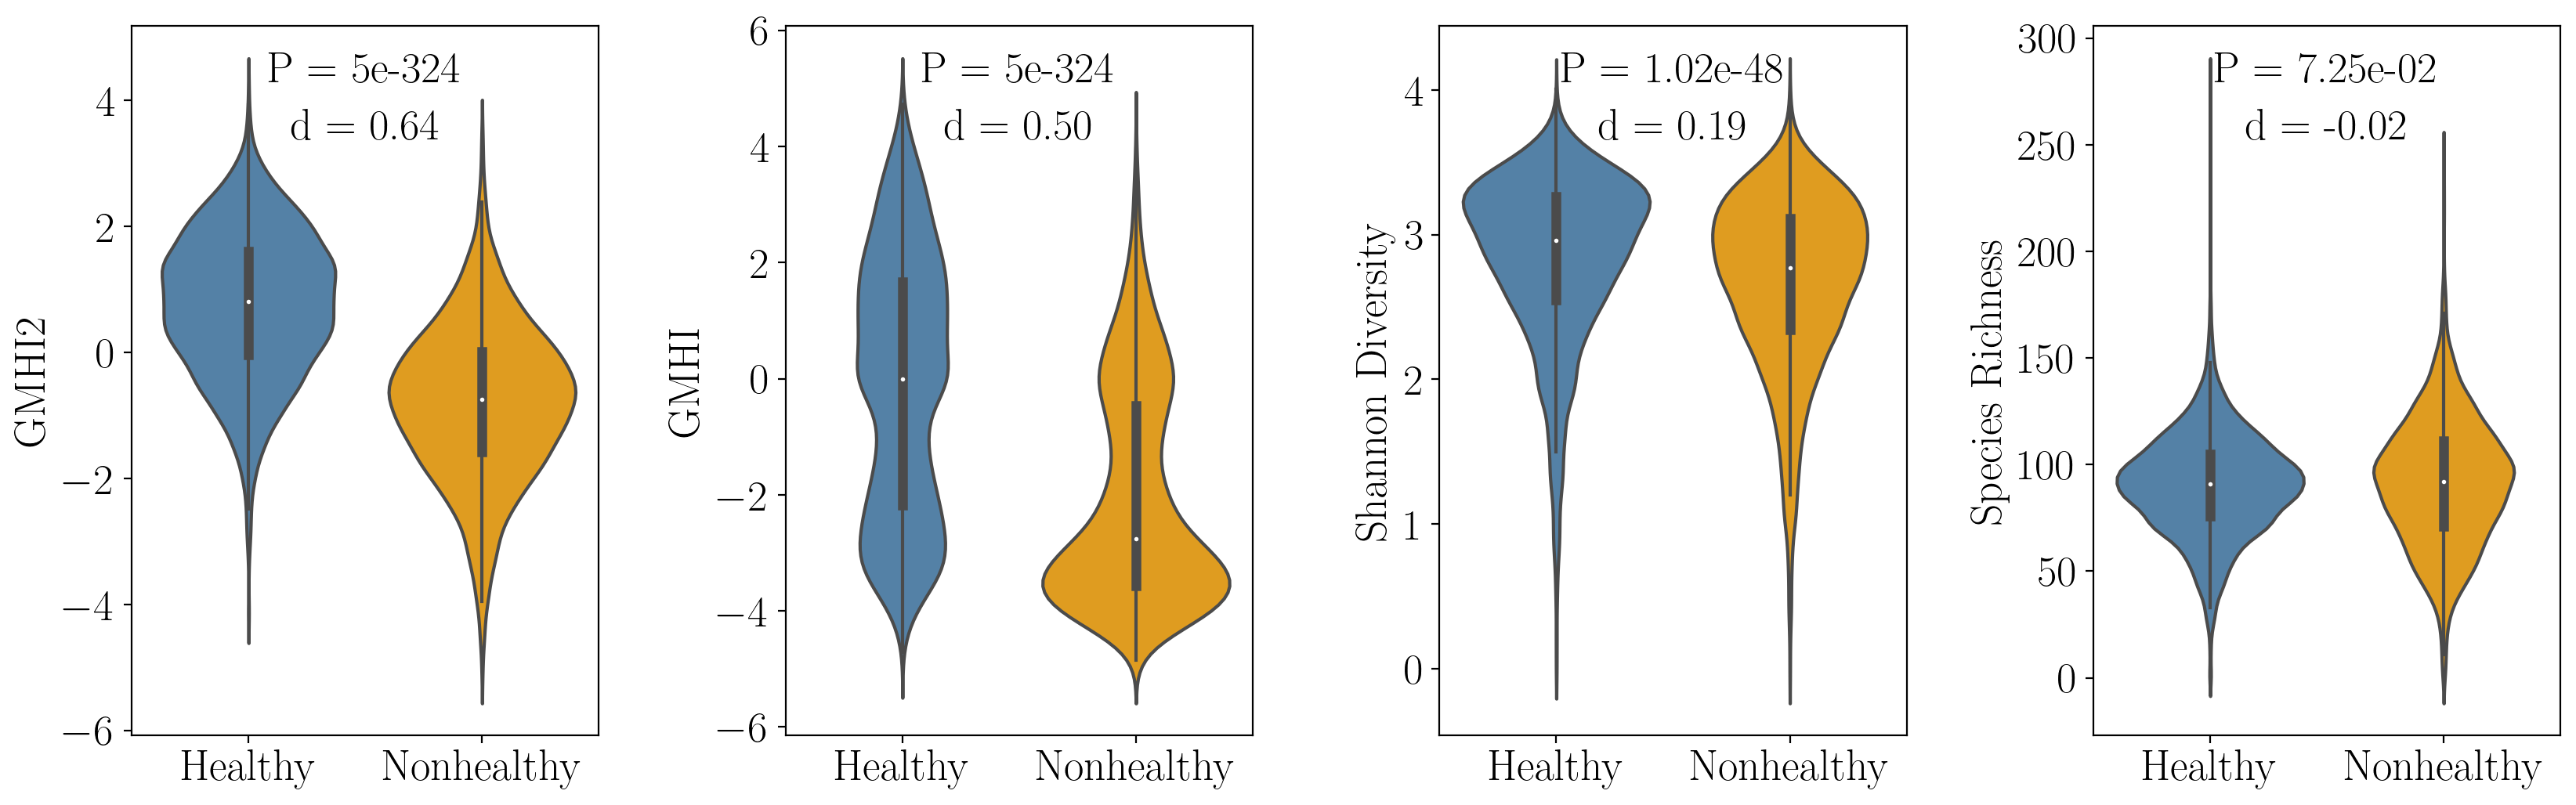

In [34]:
fig, axs = plt.subplots(ncols=4, figsize=figsize, dpi=dpi)
indices = ["GMHI2", "GMHI", "Shannon Diversity", "Species Richness"]
for ind, ax in zip(indices, axs):
    v = sns.violinplot(x="Health status", y=ind, data=data, ax=ax, 
                   palette={"Healthy" : healthy_color, "Nonhealthy" : nonhealthy_color})
    cliffs_delta, man_whitney_u_p_val = observeDifference(data[ind].iloc[y.values], data[ind].iloc[~y.values])
    
    p_text = f"P = {np.nextafter(0, 1)}" if man_whitney_u_p_val == 0 else (
        f"P = {np.format_float_scientific(man_whitney_u_p_val, precision=2)}")
    
    ax.text(0.5, 0.92, p_text, fontsize=20,
        horizontalalignment='center', transform=ax.transAxes
    )
    ax.text(0.5, 0.84, f"d = {'%.2f' % cliffs_delta}", fontsize=20,
        horizontalalignment='center', transform=ax.transAxes
    )
    
    v.tick_params(labelsize=20)
    ax.yaxis.label.set_size(20)
    ax.set_xlabel("")
fig.subplots_adjust(wspace=0.4)
plt.savefig(os.path.join(config.FIGURE_DIR, filename))